In [1]:
#!pip install ib_insync
#!pip install bs4
from ib_insync import *
from bs4 import BeautifulSoup as bs
ib = IB()

In [2]:
util.startLoop()
ib.disconnect()
ib.connect('127.0.0.1', 7497, clientId = 1)

<IB connected to 127.0.0.1:7497 clientId=1>

Error 162, reqId 3: Historical Market Data Service error message:API scanner subscription cancelled: 3
Error 162, reqId 13: Historical Market Data Service error message:API historical data query cancelled: 13, contract: Stock(symbol='AAPL', exchange='SMART', currency='USD')
Error 162, reqId 17: Historical Market Data Service error message:invalid step: 1, contract: Stock(symbol='AAPL', exchange='SMART', currency='USD')
Error 162, reqId 19: Historical Market Data Service error message:invalid step: 1, contract: Stock(symbol='AAPL', exchange='SMART', currency='USD')
Error 162, reqId 21: Historical Market Data Service error message:invalid step: 1, contract: Stock(symbol='AAPL', exchange='SMART', currency='USD')
Error 321, reqId 23: Error validating request.-'bX' : cause - Historical data bar size setting is invalid. Legal ones are: 1 secs, 5 secs, 10 secs, 15 secs, 30 secs, 1 min, 2 mins, 3 mins, 5 mins, 10 mins, 15 mins, 20 mins, 30 mins, 1 hour, 2 hours, 3 hours, 4 hours, 8 hours, 1 da

In [3]:
def onPendingTicker(ticker):
    print("pending ticker event received")
    print(ticker)
#ib.pendingTickersEvent += onPendingTicker

In [4]:
# Code for market scanning
subscription = ScannerSubscription(instrument = 'STK', locationCode = 'STK.US.MAJOR', scanCode = 'SCAN_currYrETFFYDividendYield_DESC')
scanData = ib.reqScannerData(subscription)
for scan in scanData:
    #print(scan)
    print(scan.contractDetails.contract.symbol)

A
AA
AAA
AAAU
AACG
AACI
AACIU
AACOU
AACT
AACT U
AADI
AADR
AAGR
AAL
AAMC
AAME
AAN
AAOI
AAON
AAP
AAPB
AAPD
AAPL
AAPU
AAPX
AAPY
AAT
AAU
AAXJ
AB
ABAT
ABBV
ABCB
ABCL
ABCS
ABEO
ABEQ
ABEV
ABG
ABIO
ABL
ABLLL
ABLV
ABM
ABNB
ABOS
ABR
ABR PRD
ABR PRE
ABR PRF


In [5]:
# Code for market scanning, no boundary
allParams = ib.reqScannerParameters()
print(allParams)

<?xml version="1.0" encoding="UTF-8"?>
<ScanParameterResponse>
	<InstrumentList varName="instrumentList">
		<Instrument>
			<name>US Stocks</name>
			<type>STK</type>
			<filters>ABSCHANGEPERC,AFTERHRSCHANGE,AFTERHRSCHANGEPERC,AVGOPTVOLUME,AVGPRICETARGET,AVGRATING,AVGTARGET2PRICERATIO,AVGVOLUME,AVGVOLUME_USD,CHANGEOPENPERC,CHANGEPERC,EMA_20,EMA_50,EMA_100,EMA_200,PRICE_VS_EMA_20,PRICE_VS_EMA_50,PRICE_VS_EMA_100,PRICE_VS_EMA_200,DIVIB,DIVYIELDIB,FEERATE,FIRSTTRADEDATE,GROWTHRATE,HALTED,HASOPTIONS,HISTDIVIB,HISTDIVYIELDIB,IMBALANCE,IMBALANCEADVRATIOPERC,IMPVOLAT,IMPVOLATOVERHIST,INSIDEROFFLOATPERC,INSTITUTIONALOFFLOATPERC,MACD,MACD_SIGNAL,MACD_HISTOGRAM,MKTCAP,MKTCAP_USD,NEXTDIVAMOUNT,NEXTDIVDATE,NUMPRICETARGETS,NUMRATINGS,NUMSHARESINSIDER,NUMSHARESINSTITUTIONAL,OPENGAPPERC,OPTVOLUME,OPTVOLUMEPCRATIO,PEAELIGIBLE,PERATIO,PPO,PPO_SIGNAL,PPO_HISTOGRAM,PRICE,PRICE2BK,PRICE2TANBK,PRICERANGE,PRICE_USD,QUICKRATIO,REGIMBALANCE,REGIMBALANCEADVRATIOPERC,RETEQUITY,SHORTABLESHARES,SHORTSALERESTRICTE

In [6]:
ib.run()

In [104]:
stock = Stock('AAPL', 'SMART', 'USD')
bars = ib.reqHistoricalData(stock, endDateTime = '', durationStr = '2 D', barSizeSetting = '15 secs', whatToShow = 'ADJUSTED_LAST', useRTH = True, formatDate = 2, timeout=0)

In [105]:
print(stock)

Stock(symbol='AAPL', exchange='SMART', currency='USD')


In [106]:
ib.qualifyContracts(stock)

[Stock(conId=265598, symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS')]

In [107]:
dfBars = util.df(bars)
dfBars

,date,open,high,low,close,volume,average,barCount
0,2024-03-20 13:30:00+00:00,175.72,176.07,175.50,175.99,669690.0,175.568,671
1,2024-03-20 13:30:15+00:00,175.99,176.10,175.92,176.03,57673.0,176.027,253
2,2024-03-20 13:30:30+00:00,176.02,176.03,175.89,175.89,25844.0,175.967,96
3,2024-03-20 13:30:45+00:00,175.88,175.95,175.73,175.73,24007.0,175.850,91
4,2024-03-20 13:31:00+00:00,175.71,176.03,175.67,176.02,40021.0,175.884,182
...,...,...,...,...,...,...,...,...
3115,2024-03-21 19:58:45+00:00,171.48,171.53,171.47,171.49,168368.0,171.504,819
3116,2024-03-21 19:59:00+00:00,171.49,171.53,171.44,171.50,224882.0,171.474,906
3117,2024-03-21 19:59:15+00:00,171.51,171.51,171.46,171.49,212260.0,171.488,1274
3118,2024-03-21 19:59:30+00:00,171.50,171.53,171.45,171.49,290220.0,171.501,1677


<Axes: >

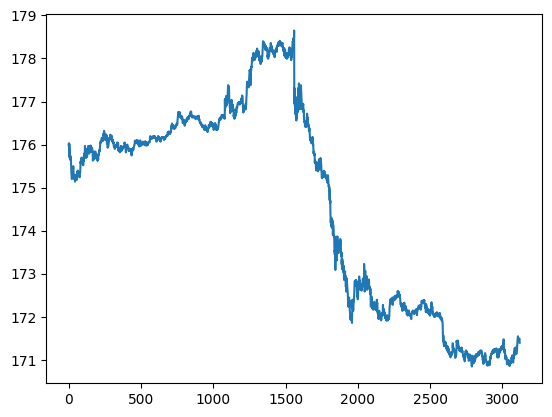

In [108]:
dfBars["close"].plot()

In [89]:
# * 'ReportsFinSummary': Financial summary
# * 'ReportsOwnership': Company's ownership
# * 'ReportSnapshot': Company's financial overview
# * 'ReportsFinStatements': Financial Statements
# * 'RESC': Analyst Estimates
# * 'CalendarReport': Company's calendar

fundamentals = ib.reqFundamentalData(stock, 'ReportSnapshot')

In [91]:
content = bs(fundamentals, features="xml")
print(content)

<?xml version="1.0" encoding="utf-8"?>
<ReportSnapshot Major="1" Minor="0" Revision="1">
<CoIDs>
<CoID Type="RepNo">05680</CoID>
<CoID Type="CompanyName">Apple Inc</CoID>
<CoID Type="IRSNo">942404110</CoID>
<CoID Type="CIKNo">0000320193</CoID>
<CoID Type="OrganizationPermID">4295905573</CoID>
</CoIDs>
<Issues>
<Issue Desc="Common Stock" ID="1" Order="1" Type="C">
<IssueID Type="Name">Ordinary Shares</IssueID>
<IssueID Type="Ticker">AAPL</IssueID>
<IssueID Type="RIC">AAPL.O</IssueID>
<IssueID Type="DisplayRIC">AAPL.OQ</IssueID>
<IssueID Type="InstrumentPI">331724</IssueID>
<IssueID Type="QuotePI">7645713</IssueID>
<IssueID Type="InstrumentPermID">8590932301</IssueID>
<IssueID Type="QuotePermID">55835312773</IssueID>
<Exchange Code="NASD" Country="USA">NASDAQ</Exchange>
<GlobalListingType>OSR</GlobalListingType>
<MostRecentSplit Date="2020-08-31">4.0</MostRecentSplit>
</Issue>
<Issue Desc="Preferred Stock" ID="2" Order="1" Type="P">
<IssueID Type="Name">Preference Shares</IssueID>
<Issue

In [92]:
ratios = content.find_all("Ratio")
for ratio in ratios:
    print(ratio['FieldName'])
    print(ratio.text)

NPRICE
178.67000
NHIG
199.62000
NLOW
155.98000
PDATE
2024-03-20T00:00:00
VOL10DAVG
69.93944
EV
2793941.00000
MKTCAP
2759001.00000
TTMREV
385706.00000
TTMEBITD
130109.00000
TTMNIAC
100913.00000
TTMEPSXCLX
6.42695
TTMREVPS
24.53947
QBVPS
4.79295
QCSHPS
4.72826
TTMCFSHR
7.14885
TTMDIVSHR
0.95000
TTMGROSMGN
45.02678
TTMROEPCT
154.26940
TTMPR2REV
7.15312
PEEXCLXOR
27.80012
PRICE2BK
37.27771
Employees
161000
ConsRecom

2.1282

TargetPrice

201.13790

ProjLTGrowthRate

11.0000

ProjPE

27.23296

ProjSales

387927.47040

ProjSalesQ

90833.38110

ProjEPS

6.56080

ProjEPSQ

1.51070

ProjProfit

100935.54120

ProjDPS

1.00770



In [93]:
ib.sleep(0)
# Use this code to update the transmitted information

True

In [94]:
def orderFilled(trade, fill):
    print("order has been filled")
    print(order)
    print(fill)
#trade.fillEvent += orderFilled

In [16]:
order = LimitOrder('Buy', 5, 91.33)
# order = MarketOrder('BUY', 10)
trade = ib.placeOrder(stock, order)
# After running this code, order will be filled

In [17]:
print(trade)

Trade(contract=Stock(conId=265598, symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS'), order=LimitOrder(orderId=7, clientId=1, permId=757928523, action='Buy', totalQuantity=5.0, lmtPrice=91.33, auxPrice=0.0), orderStatus=OrderStatus(orderId=7, status='PreSubmitted', filled=0.0, remaining=5.0, avgFillPrice=0.0, permId=757928523, parentId=0, lastFillPrice=0.0, clientId=1, whyHeld='', mktCapPrice=0.0), fills=[], log=[TradeLogEntry(time=datetime.datetime(2024, 3, 22, 5, 14, 16, 143171, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0), TradeLogEntry(time=datetime.datetime(2024, 3, 22, 5, 14, 31, 821821, tzinfo=datetime.timezone.utc), status='PreSubmitted', message='', errorCode=0)], advancedError='')


In [18]:
def orderFilled(trade, fill):
    print("order has been filled")
    print(trade)
    print(fill)

trade.fillEvent += orderFilled

In [19]:
ib.sleep(3)

for trade in ib.trades():
    print("== this is one of my trades =")
    print(trade)

for order in ib.orders():
    print("== this is one of my orders ==")
    print(order)

ib.run()

== this is one of my trades =
Trade(contract=Stock(conId=265598, symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS'), order=LimitOrder(orderId=7, clientId=1, permId=757928523, action='Buy', totalQuantity=5.0, lmtPrice=91.33, auxPrice=0.0), orderStatus=OrderStatus(orderId=7, status='PreSubmitted', filled=0.0, remaining=5.0, avgFillPrice=0.0, permId=757928523, parentId=0, lastFillPrice=0.0, clientId=1, whyHeld='', mktCapPrice=0.0), fills=[], log=[TradeLogEntry(time=datetime.datetime(2024, 3, 22, 5, 14, 16, 143171, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0), TradeLogEntry(time=datetime.datetime(2024, 3, 22, 5, 14, 31, 821821, tzinfo=datetime.timezone.utc), status='PreSubmitted', message='', errorCode=0)], advancedError='')
== this is one of my orders ==
LimitOrder(orderId=7, clientId=1, permId=757928523, action='Buy', totalQuantity=5.0, lmtPrice=91.33, auxPrice=0.0)


In [20]:
trade = ib.cancelOrder(order)

In [21]:
chains = ib.reqSecDefOptParams(stock.symbol, '', stock.secType, stock.conId)

In [22]:
dfChains = util.df(chains)
print(dfChains)

    exchange underlyingConId tradingClass multiplier  \
0       CBOE          265598         AAPL        100   
1        ISE          265598         AAPL        100   
2    EMERALD          265598         AAPL        100   
3   NASDAQBX          265598         AAPL        100   
4       PHLX          265598         AAPL        100   
5       AMEX          265598         AAPL        100   
6       MEMX          265598         AAPL        100   
7        PSE          265598         AAPL        100   
8       BATS          265598         AAPL        100   
9      SMART          265598         AAPL        100   
10  NASDAQOM          265598         AAPL        100   
11       BOX          265598         AAPL        100   
12      EDGX          265598         AAPL        100   
13   IBUSOPT          265598         AAPL        100   
14      MIAX          265598         AAPL        100   
15     CBOE2          265598         AAPL        100   
16   MERCURY          265598         AAPL       

In [109]:
ticker_list = ['AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CSCO',
 'CVX',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'KO',
 'JPM',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'CRM',
 'VZ',
 'V',
 'WBA',
 'WMT',
 'DIS',
 'DOW']

In [111]:
stock = Stock('AAPL', 'SMART', 'USD')
bars = ib.reqHistoricalData(stock, endDateTime = '', durationStr = '30 D', barSizeSetting = '1 min', whatToShow = 'ADJUSTED_LAST', useRTH = True, formatDate = 2, timeout=0)

In [118]:
import pandas as pd
from tqdm import tqdm

In [124]:
data = pd.DataFrame()
for ticker in tqdm(ticker_list):
    stock = Stock(ticker, 'SMART', 'USD')
    bars = ib.reqHistoricalData(stock, endDateTime = '', durationStr = '30 D', barSizeSetting = '1 min', whatToShow = 'ADJUSTED_LAST', useRTH = True, formatDate = 2, timeout=0)
    dfBars = util.df(bars)
    dfBars.rename(columns = {'date': 'timestamp'}, inplace = True)
    dfBars['tic'] = ticker
    data = pd.concat([data, dfBars])

100%|██████████| 30/30 [17:48<00:00, 35.63s/it]


In [125]:
data.reset_index(drop = True, inplace = True)

In [126]:
data

,timestamp,open,high,low,close,volume,average,barCount,tic
0,2024-02-08 14:30:00+00:00,208.25,208.90,208.17,208.74,63214.0,208.357,124,AXP
1,2024-02-08 14:31:00+00:00,208.85,210.15,208.81,210.15,42574.0,209.700,239,AXP
2,2024-02-08 14:32:00+00:00,210.16,211.16,210.05,211.16,48406.0,210.548,254,AXP
3,2024-02-08 14:33:00+00:00,210.88,210.95,209.64,209.75,11329.0,210.314,103,AXP
4,2024-02-08 14:34:00+00:00,209.63,209.65,209.25,209.31,31242.0,209.492,117,AXP
...,...,...,...,...,...,...,...,...,...
350995,2024-03-21 19:55:00+00:00,58.00,58.04,57.99,58.04,36649.0,58.014,245,DOW
350996,2024-03-21 19:56:00+00:00,58.03,58.04,58.00,58.02,52645.0,58.016,349,DOW
350997,2024-03-21 19:57:00+00:00,58.03,58.03,58.01,58.01,43791.0,58.019,286,DOW
350998,2024-03-21 19:58:00+00:00,58.01,58.04,58.01,58.03,57114.0,58.024,348,DOW


In [127]:
data.to_csv('stock_data.csv', index = False)

In [129]:
data.timestamp

0        2024-02-08 14:30:00+00:00
1        2024-02-08 14:31:00+00:00
2        2024-02-08 14:32:00+00:00
3        2024-02-08 14:33:00+00:00
4        2024-02-08 14:34:00+00:00
                    ...           
350995   2024-03-21 19:55:00+00:00
350996   2024-03-21 19:56:00+00:00
350997   2024-03-21 19:57:00+00:00
350998   2024-03-21 19:58:00+00:00
350999   2024-03-21 19:59:00+00:00
Name: timestamp, Length: 351000, dtype: datetime64[ns, UTC]